In [1]:
%load_ext autoreload
%autoreload 2

# Exploratory Analysis

## Spotify

In [2]:
import os
import json

import numpy as np
import pandas as pd
import tidybear as tb

import matplotlib.pyplot as plt
from plotnine import *

%matplotlib inline

from src.data_prep import get_and_clean_spotify_data
from src.data_prep import get_and_clean_setlist_fm_data
from src.data_prep import create_full_data

In [3]:
disco = get_and_clean_spotify_data("../data")

print(disco.shape)
disco.head(3).T

(123, 18)


,0,1,2
album_id,1FyNZvJ6MHO01kl3ySMPdc,1FyNZvJ6MHO01kl3ySMPdc,1FyNZvJ6MHO01kl3ySMPdc
song_id,2u8NmvhYX6wiviyxJTOhEi,21Qmkbvp6GvZdO0IMQtae5,4evJYiyxBkHcYvljAXNWZo
released,2021-02-05 00:00:00,2021-02-05 00:00:00,2021-02-05 00:00:00
album_name,Medicine At Midnight,Medicine At Midnight,Medicine At Midnight
name,Making A Fire,Shame Shame,Cloudspotter
duration_ms,255107,257427,233213
time_signature,3,4,4
tempo,91.111,122.026,134.989
key,9,7,4
mode,1,1,0


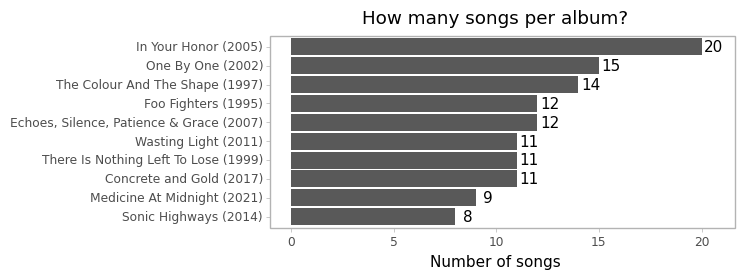

<ggplot: (176444586984)>

In [4]:
data = disco.copy()

get_display_name = lambda x: f"{x.album_name} ({x.released.year})"
data["display_name"] = data.apply(get_display_name, axis=1)

(
    ggplot(aes("reorder(display_name, n)", "n"), tb.count(data, "display_name"))
    + geom_col()
    + coord_flip()
    + geom_text(aes(label="n"), nudge_y=0.6)
    + labs(title="How many songs per album?", x=None, y="Number of songs")
    + theme_light()
    + theme(panel_grid=element_blank(), figure_size=(6, 2.5))
)


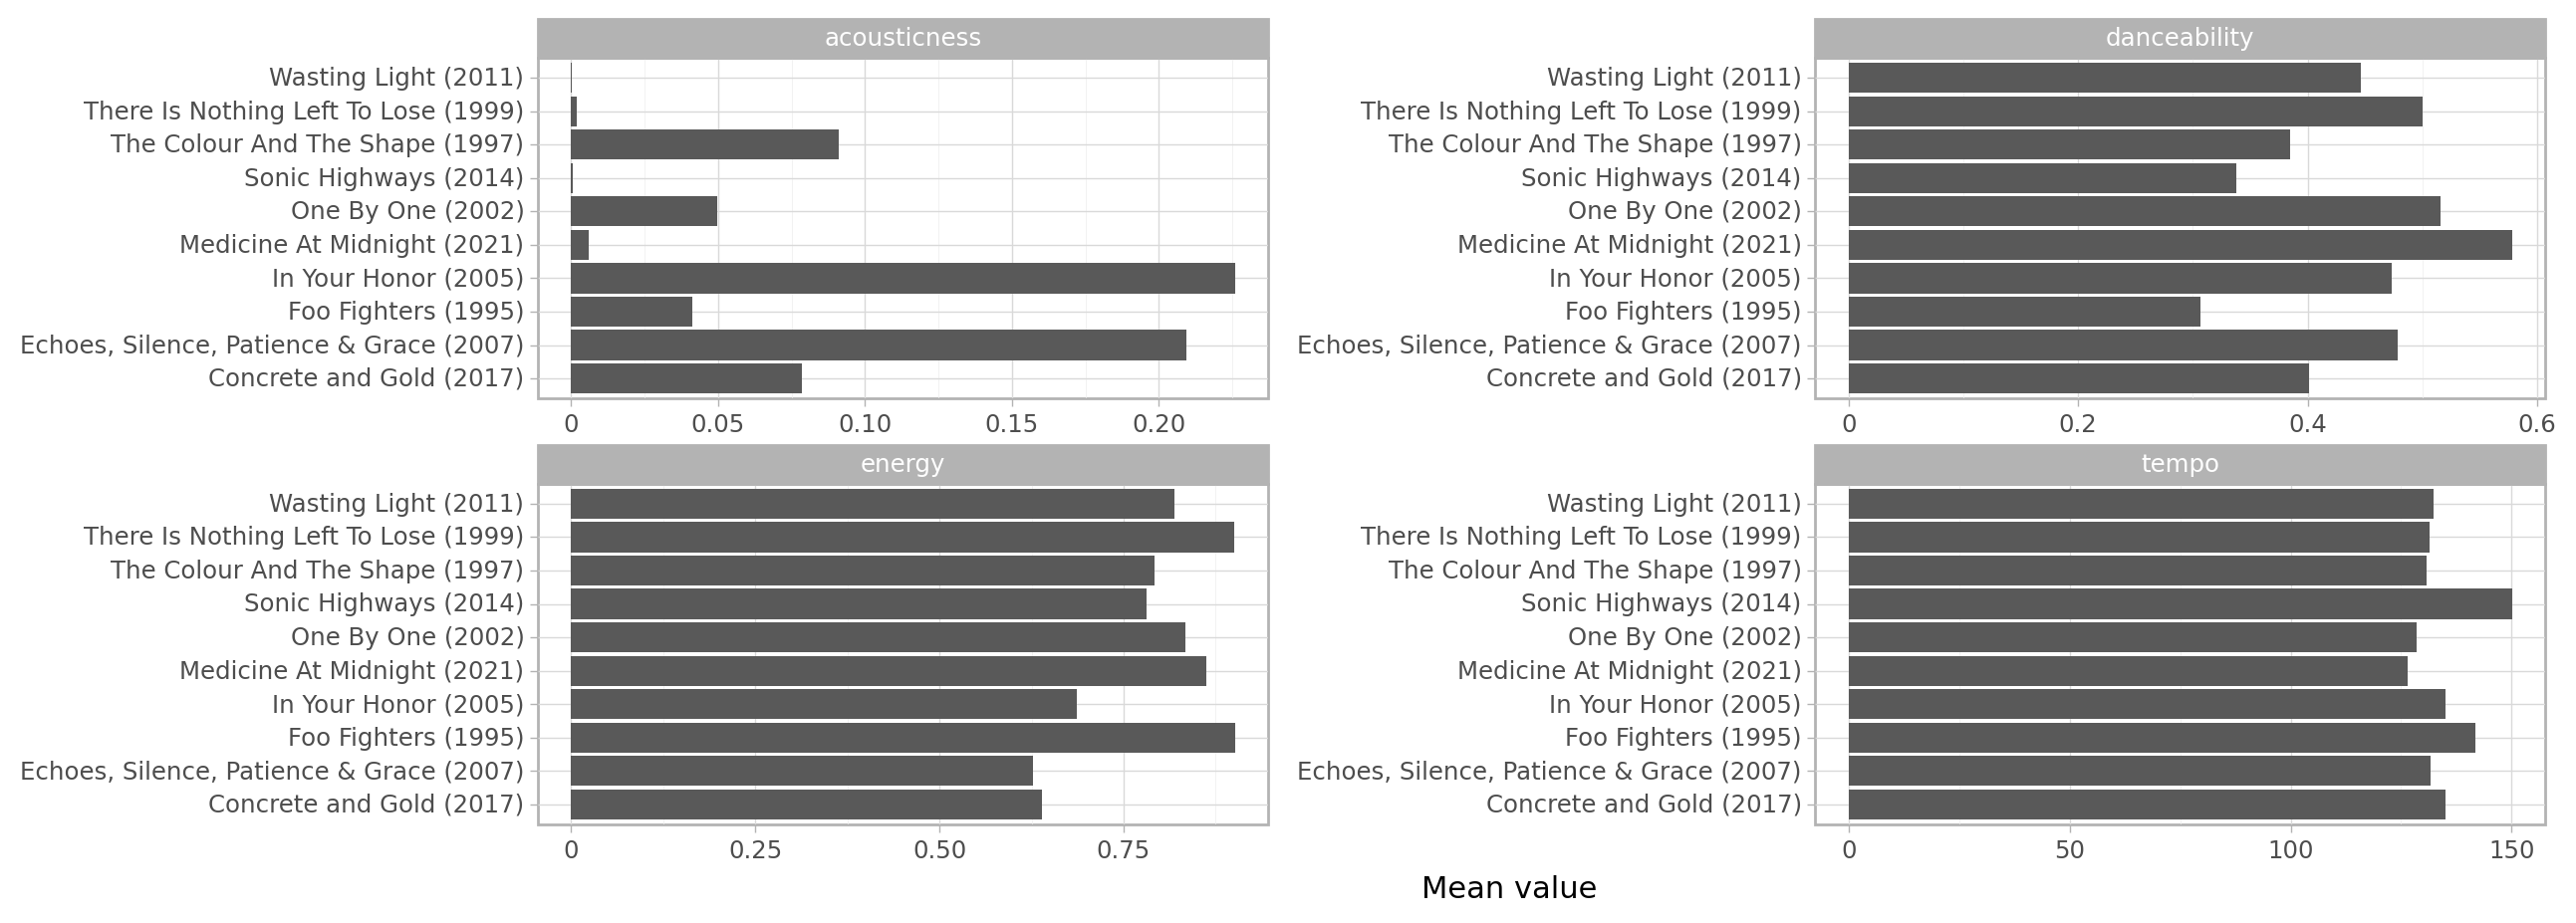

<ggplot: (176444595384)>

In [5]:
data = disco.copy()

data["display_name"] = data.apply(get_display_name, axis=1)
data["release_year"] = data.released.dt.year

rename_map = {"display_name": "album", "release_year": "year", "name": "song"}

data = tb.pivot_longer(data, rename_map.keys(), names_to="metric", cols_are_index=True)
data = tb.rename(data, rename_map)
data = data[~data.metric.isin(['album_id', 'song_id', 'released', 'album_name'])]

with tb.GroupBy(data, ["album", "year", "metric"]) as g:
    g.n()
    g.mean("value")
    g.std("value")

    data = g.summarise().reset_index()

plot_feats = ["danceability", "energy", "acousticness", "tempo"]

audio_features_tidy = data[data.metric.isin(plot_feats)].copy()
audio_features_tidy = audio_features_tidy.sort_values(["metric", "mean_value"])

(
    ggplot(aes("album", "mean_value"), audio_features_tidy)
    + geom_col()
    + coord_flip()
    + facet_wrap("metric", ncol=2, scales="free")
    + labs(x=None, y=f"Mean value")
    + theme_light()
    + theme(
        figure_size=(13, 5),
        dpi=200,
        subplots_adjust={"hspace": 0.25, "wspace": 0.75},
    )
)

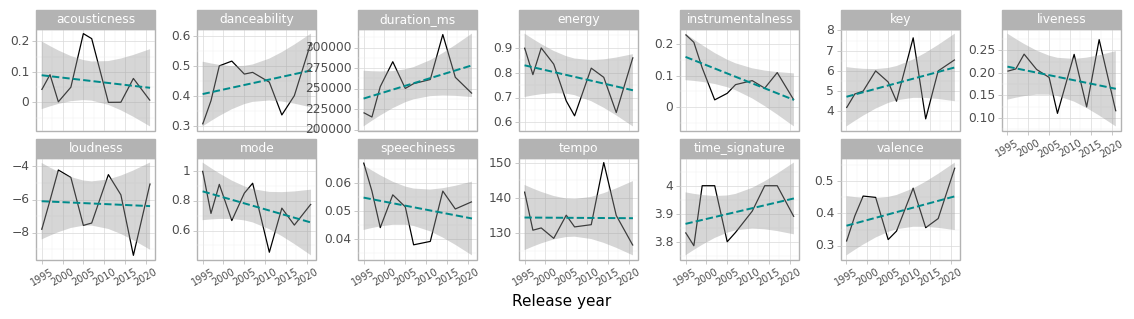

<ggplot: (176447149996)>

In [6]:
audio_features_tidy = data.copy()

(
    ggplot(aes("year", "mean_value"), audio_features_tidy)
    + geom_line()
    + geom_smooth(
        method="lm",
        color="darkcyan",
        linetype="dashed",
        size=0.8,
    )
    + facet_wrap("metric", scales="free_y", nrow=2)
    + labs(y=None, x="Release year", color="Album")
    + theme_light()
    + theme(
        figure_size=(14, 3),
        subplots_adjust={"wspace": 0.35},
        axis_text_x=element_text(angle=30, size=7),
    )
)


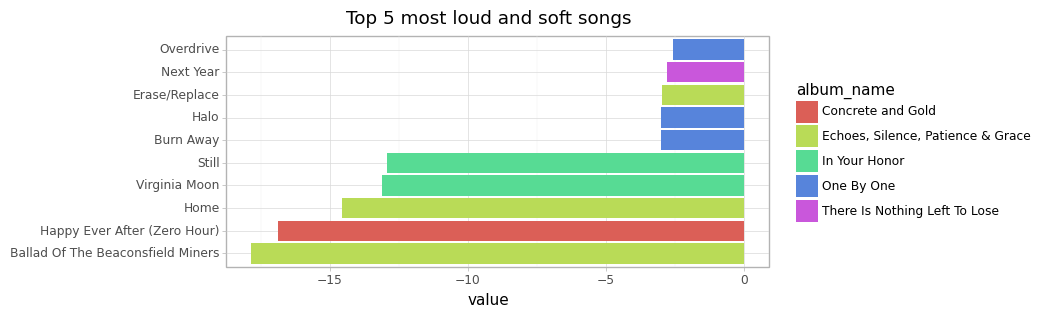

<ggplot: (176444573621)>

In [7]:
loudness = disco[["album_name", "name", "loudness"]].copy()
loudness = pd.concat(
    [
        tb.slice_max(loudness, order_by="loudness", n=5),
        tb.slice_min(loudness, order_by="loudness", n=5),
    ],
    axis=0,
)

(
    ggplot(
        aes(x="reorder(name, loudness)", y="loudness", fill="album_name"),
        loudness,
    )
    + geom_col()
    + coord_flip()
    + labs(x=None, y="value", title=f"Top 5 most loud and soft songs")
    + theme_light()
    + theme(figure_size=(7, 3))
)


---

## Setlist FM

In [8]:
full_data = create_full_data("../data")

print(full_data.shape)
full_data.head(3).T

(18828, 22)


,0,1,2
venue,Tempe Beach Park,Dolby Live at Park MGM,Hollywood Casino Amphitheatre
country,US,US,US
event_date,2022-02-26 00:00:00,2021-12-02 00:00:00,2021-08-03 00:00:00
set_position,0.789474,0.086957,0.714286
album_id,1FyNZvJ6MHO01kl3ySMPdc,1FyNZvJ6MHO01kl3ySMPdc,1FyNZvJ6MHO01kl3ySMPdc
song_id,2u8NmvhYX6wiviyxJTOhEi,2u8NmvhYX6wiviyxJTOhEi,2u8NmvhYX6wiviyxJTOhEi
released,2021-02-05 00:00:00,2021-02-05 00:00:00,2021-02-05 00:00:00
album_name,Medicine At Midnight,Medicine At Midnight,Medicine At Midnight
name,Making A Fire,Making A Fire,Making A Fire
duration_ms,255107,255107,255107


In [9]:
with tb.GroupBy(full_data, ["album_name", "name"]) as g:
    g.n(name="num_performances")
    g.mean("set_position", name="average_set_position", decimals=2)
    g.min("event_date", name="first_performed")
    g.max("event_date", name="last_performed")

    setlists = g.summarise().reset_index()
    
setlists["days_as_possible_song"] = setlists.last_performed - setlists.first_performed
setlists["days_as_possible_song"] = setlists.days_as_possible_song / np.timedelta64(1, "D")
setlists["likelihood_to_perform"] = setlists.num_performances / setlists.days_as_possible_song

setlists.head(3).T

,0,1,2
album_name,Concrete and Gold,Concrete and Gold,Concrete and Gold
name,Arrows,Concrete and Gold,Dirty Water
num_performances,3,1,88
average_set_position,0.63,0.94,0.78
first_performed,2017-07-10 00:00:00,2017-10-14 00:00:00,2017-07-03 00:00:00
last_performed,2018-01-23 00:00:00,2017-10-14 00:00:00,2019-08-21 00:00:00
days_as_possible_song,197.0,0.0,779.0
likelihood_to_perform,0.015228,inf,0.112965


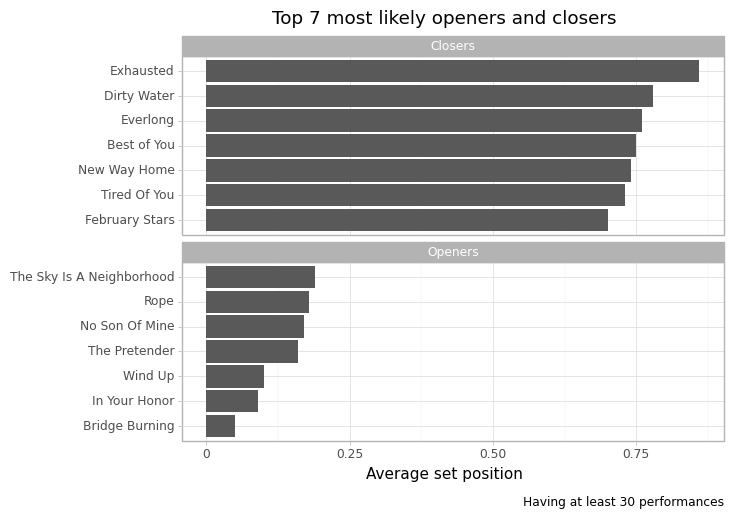

<ggplot: (176447055620)>

In [10]:
n = 7
min_ = 30

data = setlists.query(f"num_performances > {min_}")
data = data.loc[np.isfinite(data.average_set_position)]

data = pd.concat(
    [
        tb.slice_max(data, order_by="average_set_position", n=n).assign(pos="Closers"),
        tb.slice_min(data, order_by="average_set_position", n=n).assign(pos="Openers"),
    ]
)

(
    ggplot(aes(x="reorder(name, average_set_position)", y="average_set_position"), data)
    + geom_col()
    + coord_flip()
    + labs(
        x=None,
        y="Average set position",
        title=f"Top {n} most likely openers and closers",
        caption=f"Having at least {min_} performances",
    )
    + theme_light()
    + theme(figure_size=(7, 5))
    + facet_wrap("pos", scales="free_y", nrow=2)
)


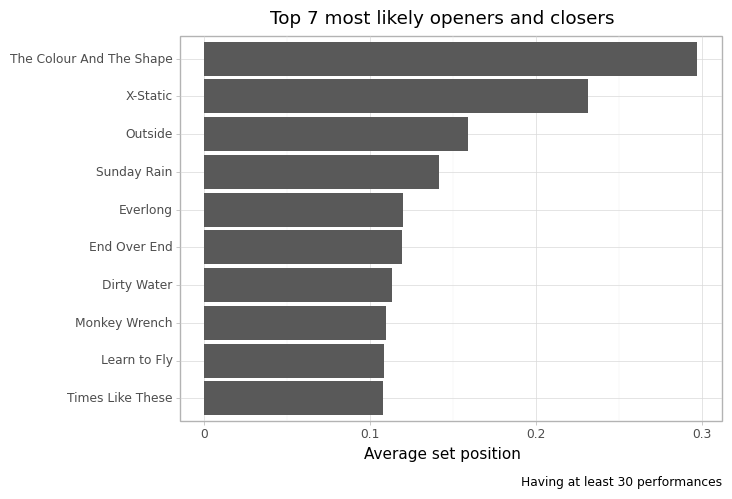

<ggplot: (176444591852)>

In [17]:
(
    ggplot(
        aes(x="reorder(name, likelihood_to_perform)", y="likelihood_to_perform"),
        tb.slice_max(setlists.query("num_performances > 30"), order_by="likelihood_to_perform", n=10),
    )
    + geom_col()
    + coord_flip()
    + labs(
        x=None,
        y="Average set position",
        title=f"Top {n} most likely openers and closers",
        caption=f"Having at least {min_} performances",
    )
    + theme_light()
    + theme(figure_size=(7, 5))
)
